<div align="center">

# Assignment 1: Learning from Data and Related Challenges

### Linear Models for Regression

</div>

### 1 Linear regression impact on outliers

#### outliers 
Outliers are data points that differ significantly from other observations from in a dataset. They may be unusually high or low values and can result from varaibility in data, measurements errors or experimental anomalies. Outliers can affect the result of data analysis, especially in regression, by skewing the model or influencing statistical conclusions.

1. You are given a set of data points related to the independent variable (x) and dependent variable (y) in Table 1.

**Table 1: Data set**

| i  | xᵢ | yᵢ    |
|----|----|-------|
| 1  | 0  | 20.26 |
| 2  | 1  | 5.61  |
| 3  | 2  | 3.14  |
| 4  | 3  | -30.00|
| 5  | 4  | -40.00|
| 6  | 5  | -8.13 |
| 7  | 6  | -11.73|
| 8  | 7  | -16.08|
| 9  | 8  | -19.95|
| 10 | 9  | -24.03|

2.  Use all data given in Table 1 to find a linear regression model. Plot x, y as a scatter
 plot and plot your linear regression model in the same scatter plot.

Regression line: y = -3.56x + 3.92


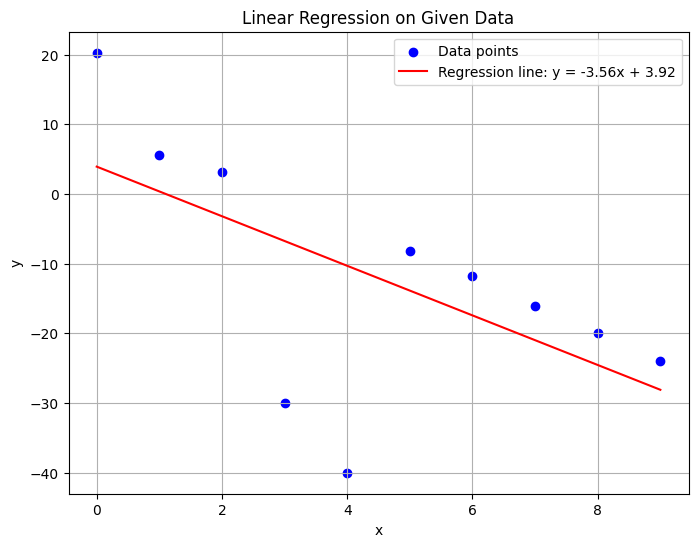

In [35]:
import numpy as np
from matplotlib import pyplot as plt

# Data points of the table 1
x = np.array([0,1,2,3,4,5,6,7,8,9])
y = np.array([20.26,5.61,3.14,-30.00,-40.00,-8.13,-11.73,-16.08,-19.95,-24.03], dtype=float)

# Fit linear regression model using numpy
a,b = np.polyfit(x, y, 1)     # np.polyfit gives the slope and intercept and fits the line  
                              # 1 = degree of the fitting polynomial
print(f"Regression line: y = {a:.2f}x + {b:.2f}")

# Predicted values
y_pred = a * x + b

# Plot scatter and regression line
plt.figure(figsize=(8,6))
plt.scatter(x, y, color="blue", label="Data points")
plt.plot(x, y_pred, color="red", label=f"Regression line: y = {a:.2f}x + {b:.2f}")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Linear Regression on Given Data")
plt.legend()
plt.grid(True)
plt.show()


You are given two linear models as follows:
- **Model 1:** $y = -4x + 12$
- **Model 2:** $y = -3.55x + 3.91$

Here, Model 2 is your linear regression model learned in Task 2.

A robust estimator is introduced to reduce the impact of outliers. The robust estimator finds model parameters which minimize the following loss function:

$$
L(\theta, \beta) = \frac{1}{N} \sum_{i=1}^{N} \frac{(y_i - \hat{y}_i)^2}{(y_i - \hat{y}_i)^2 + \beta^2}
$$

where:
- $y_i$ is the actual value
- $\hat{y}_i$ is the predicted value
- $\beta$ is a constant that controls the robustness
- $N$ is the number of data points


A **loss function** measures how well a model's predictions match the actual data. It calculates the error between predicted and true values; lower loss means better fit. In regression, common loss functions include mean squared error (MSE)

An estimator is an algorithm or method used to find the best model parameters (like slope and intercept in linear regression) by minimizing the loss function.

Outliers are data points that are very different from most others. They can have a large impact on the model by increasing the loss, causing the estimator to fit the model poorly for the majority of the data. Outliers can skew the regression line, making predictions less accurate for typical data points. Robust estimators use special loss functions to reduce the influence of outliers and produce a model that better represents the main data trend.

- **Model 1:** $y = -4x + 12$
- **Model 2:** $y = -3.55x + 3.91$    (In the previous question we got $y = -3.56x + 3.92$ )

For the two models given in Task 3, calculate the loss function $L(\theta, \beta)$ for all data samples using equation (1) for the following values of $\beta$:
- $\beta = 1$
- $\beta = 10^{-6}$
- $\beta = 10^{3}$

You may use a computer program to perform these calculations.

In [36]:
def loss_value(y_true, y_pred, beta):
    if (len(y_true) != len(y_pred)):
        raise ValueError("y_true and y_pred must have the same length")
    else:
        term1 = (y_true - y_pred) ** 2
        loss = np.mean(term1 / (term1 + beta**2))
        return loss

# models
model1 = -4*x + 12
model2 = -3.56*x + 3.92

# try different beta values
beta_array = [1.0, 1e-6, 1e3]
results = []

for beta in beta_array:
    loss1 = loss_value(y, model1, beta)
    loss2 = loss_value(y, model2, beta)
    results.append((beta, loss1, loss2))
    print(f"Beta: {beta:g}, Loss1: {loss1:.6f}, Loss2: {loss2:.6f}")


Beta: 1, Loss1: 0.435416, Loss2: 0.973387
Beta: 1e-06, Loss1: 1.000000, Loss2: 1.000000
Beta: 1000, Loss1: 0.000227, Loss2: 0.000188


**Interpretation of Results:**

- For very small $\beta$ ($\beta = 10^{-6}$), the loss function behaves like mean squared error (MSE). All errors, including those from outliers, are counted fully. Both models have a loss close to 1, meaning the errors are significant and outliers have a strong influence.
- For $\beta = 1$, the loss is lower, especially for Model 1. This shows that the robust loss function starts to reduce the impact of large errors (outliers).
- For very large $\beta$ ($\beta = 10^{3}$), the loss values are very small for both models. The denominator dominates, so all errors are down-weighted, and the loss function becomes less sensitive to outliers and even regular errors.

**Summary:**
- Small $\beta$: Outliers have a big effect, loss is high.
- Large $\beta$: Outliers have little effect, loss is low.
- The robust loss function helps control the influence of outliers by adjusting $\beta$.

What is the suitable β value to mitigate the impact of the outliers. Justify your
 answer.

**Choosing a Suitable $\beta$ Value to Mitigate Outliers**

To effectively reduce the impact of outliers, $\beta$ should not be too small or too large:
- If $\beta$ is too small, the loss function acts like mean squared error and is highly sensitive to outliers.
- If $\beta$ is too large, the loss function ignores all errors, making the loss artificially small and not meaningful.

A suitable $\beta$ is typically chosen based on the expected noise or variability in the data, such as the standard deviation of the residuals. This allows the loss function to down-weight outliers while still reflecting the fit for most data points.

**Justification:**
- Setting $\beta$ close to the typical error in data ensures that regular errors are considered, but outliers do not dominate the loss.
- can experiment with different $\beta$ values and observe the loss. Choose a $\beta$ where the loss is not dominated by outliers, but also not artificially small due to a huge denominator.

In practice, use domain knowledge or data statistics to select $\beta$, and compare models using the robust loss with a reasonable $\beta$ for fair assessment.

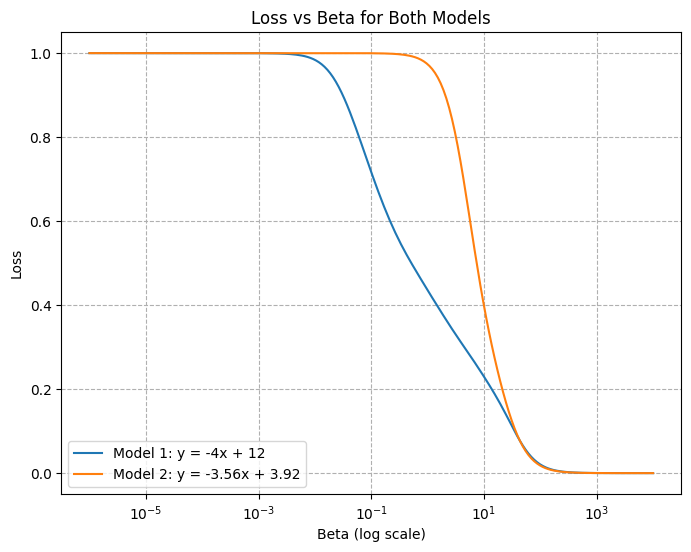

In [37]:
# Range of beta values
beta_values = np.logspace(-6, 4, 200)
loss1 = [loss_value(y, model1, beta) for beta in beta_values]
loss2 = [loss_value(y, model2, beta) for beta in beta_values]

# Plot
plt.figure(figsize=(8,6))
plt.plot(beta_values, loss1, label='Model 1: y = -4x + 12')
plt.plot(beta_values, loss2, label='Model 2: y = -3.56x + 3.92')
plt.xscale('log')
plt.xlabel('Beta (log scale)')
plt.ylabel('Loss')
plt.title('Loss vs Beta for Both Models')
plt.legend()
plt.grid(True, which='both', ls='--')
plt.show()

Therefore beta approximately equal 1 balances sensitivity to normal errors while reducing the effect of extreme outliers. 

Utilizing this robust estimator with selected β value, determine the most suitable
 model from the models specified in task 3 for the provided dataset. Justify your
 selection.

**Model Selection Using the Robust Estimator**

Regression line from linear regression:
- $y = -3.56x + 3.92$

Using the robust estimator with $\beta \approx 1$, the computed loss values are:
- Model 1 ($y = -4x + 12$)  : Loss = 0.435416
- Model 2 ($y = -3.56x + 3.92$)  : Loss = 0.973387

**How error values affect model selection:**
- The loss value quantifies how well each model fits the majority of the data, with lower values indicating a better fit.
- Model 1 has a significantly lower loss than Model 2, meaning it is less affected by outliers and better captures the main trend in the data.
- The robust estimator ensures that extreme errors (from outliers) do not dominate the loss, so the comparison is fair and meaningful.

**Conclusion:**
Model 1 ($y = -4x + 12$) is the most suitable for the provided dataset when using the robust estimator with $\beta \approx 1$, because its lower error value shows it fits the data better while minimizing the impact of outliers.

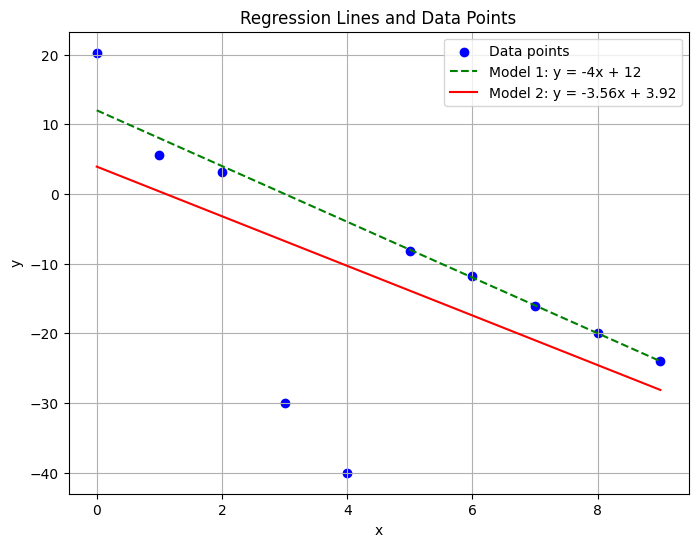

In [38]:

plt.figure(figsize=(8,6))
plt.scatter(x, y, color='blue', label='Data points')
plt.plot(x, model1, color='green', linestyle='--', label='Model 1: y = -4x + 12')
plt.plot(x, model2, color='red', linestyle='-', label='Model 2: y = -3.56x + 3.92')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Regression Lines and Data Points')
plt.legend()
plt.grid(True)
plt.show()

 Howdoes this robust estimator reduce the impact of the outliers?
 

The robust estimator reduces the impact of outliers by bounding the contribution of very large residuals. In ordinary least squares, the squared error grows without limit, so outliers dominate the loss and pull the regression line toward them. In the robust loss, when the residual $(y_i - \hat{y}_i)$ is large compared to $\beta$, the fraction

$$
\frac{(y_i - \hat{y}_i)^2}{(y_i - \hat{y}_i)^2 + \beta^2}
$$

approaches 1, meaning the penalty is capped. Thus, outliers cannot disproportionately affect the parameter estimation. This ensures the model reflects the overall trend of the data rather than being distorted by a few extreme points.

The robust estimator reduces the effect of outliers by limiting their contribution to the loss. Normal squared error keeps increasing as errors get bigger, but the robust loss flattens out for large errors. This way, outliers don’t drag the regression line too much.

 Identify another loss function that can be used for this robust estimator. 

Another loss function that can be used for robust estimation is the **Huber loss**. It behaves like squared error for small residuals but switches to absolute error for large residuals, maintaining sensitivity for normal data while reducing the effect of outliers.

Mathematically, if we denote the residual as $r = y_i - \hat{y}_i$, then the Huber loss is defined as:

$$
L_\delta(r) = \begin{cases}
    \frac{1}{2} r^2 & \text{if } |r| \leq \delta \\
    \delta (|r| - \frac{1}{2}\delta) & \text{if } |r| > \delta
\end{cases}
$$

- For small errors ($|r| \leq \delta$): the loss is quadratic ($\frac{1}{2} r^2$), same as MSE.
- For large errors ($|r| > \delta$): the loss grows linearly ($\delta(|r| - \frac{1}{2}\delta)$), reducing the weight of outliers.

Thus, the Huber loss smoothly combines the advantages of MSE (sensitive to small errors) and MAE (robust to large errors), making it effective for regression tasks with outliers.
